# Machine Learning Mini Project 2
## Richard Campo in collaboration with Julia Klauss

In [129]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [100]:
df_audit = pd.read_csv("Data-Audit.csv")

### 2. Forest for the Trees Questions
#### Q1. 
Factors that could predict whether a firm is likely to commit tax evasion could include:
1. size - small firms might be more likely to evade taxes because they believe they are less likely to get caught
2. sector - Regulated sectors such as healthcare may be less likely to evade taxes because they face more government scrutiny
3. past tax evasion - if a firm has evaded taxes in the past, we might think they are more likely to evade taxes in the future
4. past accounting mistakes - if a firm has made accounting mistakes in the past, they may be more likely to commit tax evasion
5. firm structure - a business run by a sole proprietor might be more likely to evade taxes than partnerships or corporations because the sole proprietor likely has less oversight
6. location - tax evasion may be more prevalent in certain parts of the country


#### Q2.
If an interaction term in the true model is not included in the estimated model, KNN can still fit the data nonlinearly to approximate the differential slopes created by the interaction term because the fitted line can jump at the location where the slopes should change. LPM, however, will be unable to allow for differential slopes without the interaction term, so it will just plot one continuous line through the data without allowing for any nonlinearity (assuming polynomial terms are not included).

### 3. Data Analysis Questions
#### Q3.

In [101]:
df_audit = df_audit.dropna(axis=0)

X = df_audit.drop("Risk", axis=1)
y = df_audit["Risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.50, random_state=13
    )

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)

#### (a.)

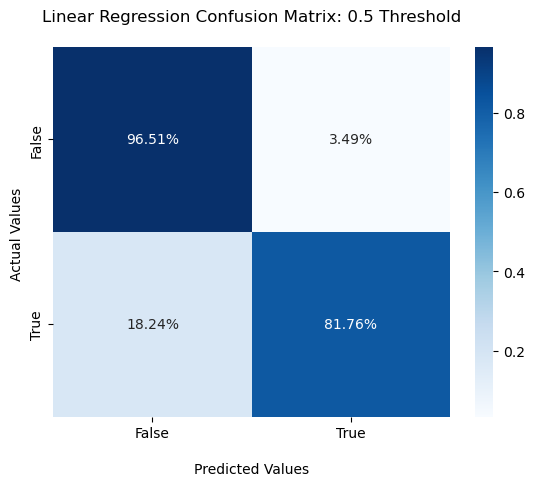

In [102]:
linear_pred_05 = np.where(linear_pred > 0.5, 1, 0)

cm_linear_05 = confusion_matrix(y_test, linear_pred_05, normalize="true")

ax = sns.heatmap(cm_linear_05, annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Linear Regression Confusion Matrix: 0.5 Threshold\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

If we set the threshold at 0.5, we miss about 18% of firms who evade taxes that we predict will not. We also incorrectly predict that about 3.5% of firms that do not evade taxes will.

#### (b.)

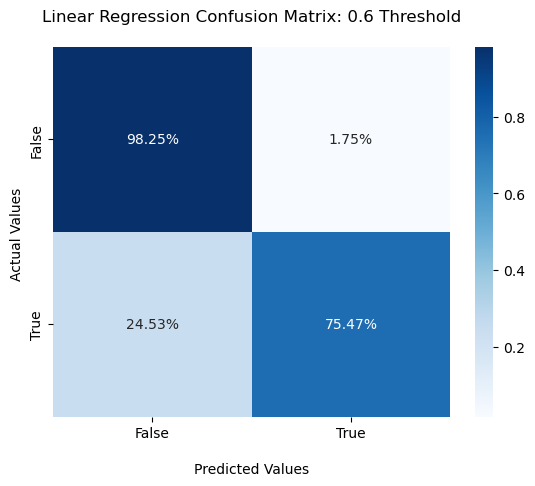

In [103]:
linear_pred_06 = np.where(linear_pred > 0.6, 1, 0)

cm_linear_06 = confusion_matrix(y_test, linear_pred_06, normalize="true")

ax = sns.heatmap(cm_linear_06, annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Linear Regression Confusion Matrix: 0.6 Threshold\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

If we raise the threshold to 0.6, meaning we make it harder to classify firms as likely tax evaders, then we get more false negatives, but fewer false positives. The false negative rate increased from 18.24% to 24.53% and the false positive rate decreased from 3.49% to 1.75%.

#### (c.)

In [104]:
acc_05 = accuracy_score(y_test, linear_pred_05)
acc_06 = accuracy_score(y_test, linear_pred_06)

print("0.5 threshold accuracy: ", round(acc_05, 3))
print("0.6 threshold accuracy: ", round(acc_06, 3))
print("\n")
print("0.5 threshold error rate: ", round(1 - acc_05, 3))
print("0.6 threshold error rate: ", round(1 - acc_06, 3))


0.5 threshold accuracy:  0.905
0.6 threshold accuracy:  0.889


0.5 threshold error rate:  0.095
0.6 threshold error rate:  0.111


With a threshold of 0.5, the accuracy of the linear model is about 90.5%, so it has an error rate of about 9.5%.

If we use a 0.6 threshold instead, the accuracy decreases to about 88.9%, meaning an error rate of about 11.1%.

Taken together, the model with a threshold of 0.5 is more accurate than the model with a threshold of 0.6. Its error rate is about 1.6 percentage points lower.

#### (d.)


In [105]:
precision_05 = precision_score(y_test, linear_pred_05, zero_division=0)
precision_06 = precision_score(y_test, linear_pred_06, zero_division=0)

print("0.5 threshold precision: ", round(precision_05, 3))
print("0.6 threshold precision: ", round(precision_06, 3))

0.5 threshold precision:  0.942
0.6 threshold precision:  0.968


In the model with a 0.5 threshold, 94.2% of firms predicted to evade taxes actually evaded taxes.

In the model with a 0.6 threshold, 96.8% of firms predicted to evade taxes actually evaded taxes.

This means that the model with a threshold of 0.6 is more precise than the model with a thresholf 0.5 by 2.6 percentage points.

#### Q4.

In the context of this question, a false negative is a firm that we predict will not evade taxes but does, and a false positive is a firm that we predict will evade taxes but does not. The consequences of a false positive are that we audit a firm that is not evading taxes, which will be annoying for that firm but not a big deal overall. The consequences of a false negative are that we don't catch a tax evader, whih is a bigger problem if we are trying to increase tax revenue. So, we'd rather have more false positives and fewer false negatives to catch more tax evaders.

This means that we would rather have a lower threshold, like 0.5, so that our model is more sensitive to possible tax evasion. If we wanted to catch even more tax evaders, we could lower the threshold further. However, the cost is that we will get more false positives, and then have to audit more firms that are not evading taxes.

#### Q5.
#### a.

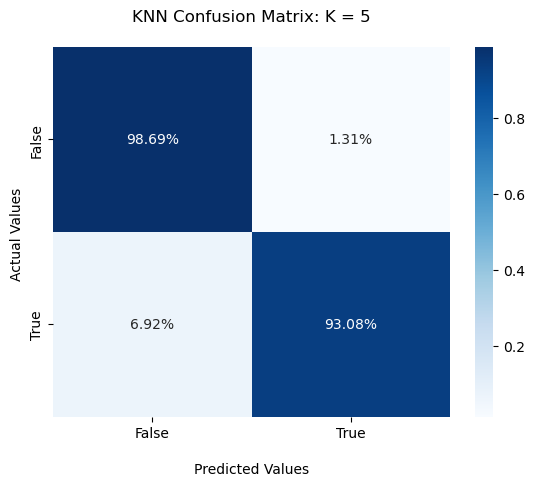

In [106]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)
knn_5_pred = knn_5.predict(X_test)

cm_knn5 = confusion_matrix(y_test, knn_5_pred, normalize = 'true')

ax = sns.heatmap(cm_knn5, annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('KNN Confusion Matrix: K = 5\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### b.

In [107]:
acc_knn_5 = accuracy_score(y_test, knn_5_pred)

print("KNN K = 5 accuracy: ", round(acc_knn_5, 3))
print("KNN K = 5 error rate: ", round(1 - acc_knn_5, 3))

KNN K = 5 accuracy:  0.964
KNN K = 5 error rate:  0.036


KNN with K = 5 has an accuracy score of about 96.4% and thus an error rate of about 3.6%. This is more accurate than the linear probability models, which had accuracy scores around 90%.

#### c.

In [108]:
prec_knn_5 = precision_score(y_test, knn_5_pred, zero_division=0)

print("KNN K = 5 precision: ", round(prec_knn_5, 3))

KNN K = 5 precision:  0.98


KNN with K = 5 has a precision score of about 98%, meaning about 98% of firms predicted to evade taxes did evade taxes. This precision score is similar to those of the linear probability models we tested.

#### Q6.

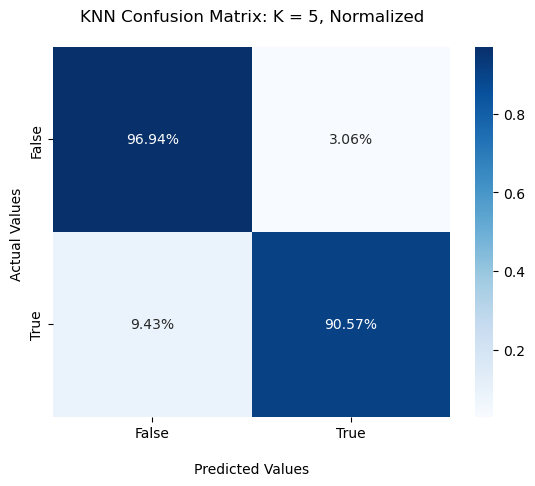

In [110]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_final = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.50, random_state=13
    )

knn_5_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_5_scaled.fit(X_train, y_train)
knn_5_scaled_pred = knn_5_scaled.predict(X_test)

cm_knn5_scaled = confusion_matrix(y_test, knn_5_scaled_pred, normalize = 'true')

ax = sns.heatmap(cm_knn5_scaled, annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('KNN Confusion Matrix: K = 5, Normalized\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### b.

In [112]:
acc_knn_5_scaled = accuracy_score(y_test, knn_5_scaled_pred)

print("KNN with K = 5 scaled X accuracy score: ", round(acc_knn_5_scaled, 3))
print("KNN with K = 5 scaled X accuracy score: ", round(1 - acc_knn_5_scaled, 3))

KNN with K = 5 scaled X accuracy score:  0.943
KNN with K = 5 scaled X accuracy score:  0.057


With scaled predictors, the accuracy score of KNN with K = 5 unexpectedly dropped from about 96.4% to about 94.3%, so the error rate increased from about 3.6% to about 5.7%.

#### c.

In [115]:
prec_knn_5_scaled = precision_score(y_test, knn_5_scaled_pred)

print("KNN with K = 5 scaled X precision score: ", round(prec_knn_5_scaled, 3))

KNN with K = 5 scaled X precision score:  0.954


With scaled predictors, the precision score of KNN with K = 5 also decreased from about 98% to about 95.4%, meaning about 95.4% of firms precited to evade taxes actually evaded taxes.

#### Q7.

KNN with K = 5 and scaled predictors performs worse both in terms of accuracy and precision. This is unexpected because scaling is supposed to typically improve the performance of KNN because it ensures distances between points are calculated based on where the points fall in a normal distribution rather than how a particular variable is measured. Since normalization assumes all variables are equally important, worse performance using normalization indicates that not all variables are of equal importance for predicting tax evasion.

#### Q8.

In [133]:
max_k = round(np.sqrt(df_audit.shape[0]))
ks = list(range(1, max_k))

para = {'n_neighbors': ks}

knn_i = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_i, para, cv=KFold(5, random_state=13, shuffle=True))

knn_cv.fit(X, y)

print("Best parameters:", knn_cv.best_params_)
print("Best cross-validation score:", round(knn_cv.best_score_, 3))
print("Error rate: ", round(1 - knn_cv.best_score_, 3))

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.979
Error rate:  0.021


The value of K with the highest accuracy score is K = 1, which has an error rate of about 2.1%.

#### Q9.


If the government heavily relies on the KNN-1 model derived from this sample to target audits, it will miss firms that were unlike those in our sample of audited firms. For example, if the Indian government did not audit criminal enterprises, then it will continue to not catch tax evasion among that sector. The given sample could have other biases too, such as overrepresentation of certain industries or locations.

 To help solve this problem, the government could collect more data from random audits of a wide range of firms to get a more diverse sample. They could then train the model on this additional data to improve its accuracy and predictive power.